## Import the required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
 ## To display the figure inside this notebook only
import warnings
warnings.filterwarnings('ignore')  # when we face some warnings against some packages

In [8]:
data = pd.read_csv("student.csv")

## Profile of the Data

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
data.shape

(1000, 8)

#### Segregate Numerical and Categorical data

In [16]:
numerical_data = [feature for feature in data.columns if data[feature].dtype != 'O' ]
categorical_data = [feature for feature in data.columns if data[feature].dtype == 'O'  ]

In [17]:
numerical_data

['math score', 'reading score', 'writing score']

In [18]:
categorical_data

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [21]:
data[numerical_data].head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [22]:
data[categorical_data].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Memory usage

In [25]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## Checkin Missing Value

In [27]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There is no null value in the data

## Checkin duplicate values

In [31]:
data.duplicated().sum()

0

#### No duplicate value in the data

## Checking unique value of each feature

In [34]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [35]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

## Statistical Analysis

In [36]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Correlation of the data

In [39]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


#### Covariance of the data

In [40]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


#### Skewness of the data

In [42]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

#### We can conclude that :
#### math score is left skewed (negative value)
#### reading score is left skewed (negative value)
#### reading score is left skewed (negative value)

<AxesSubplot:xlabel='reading score', ylabel='Density'>

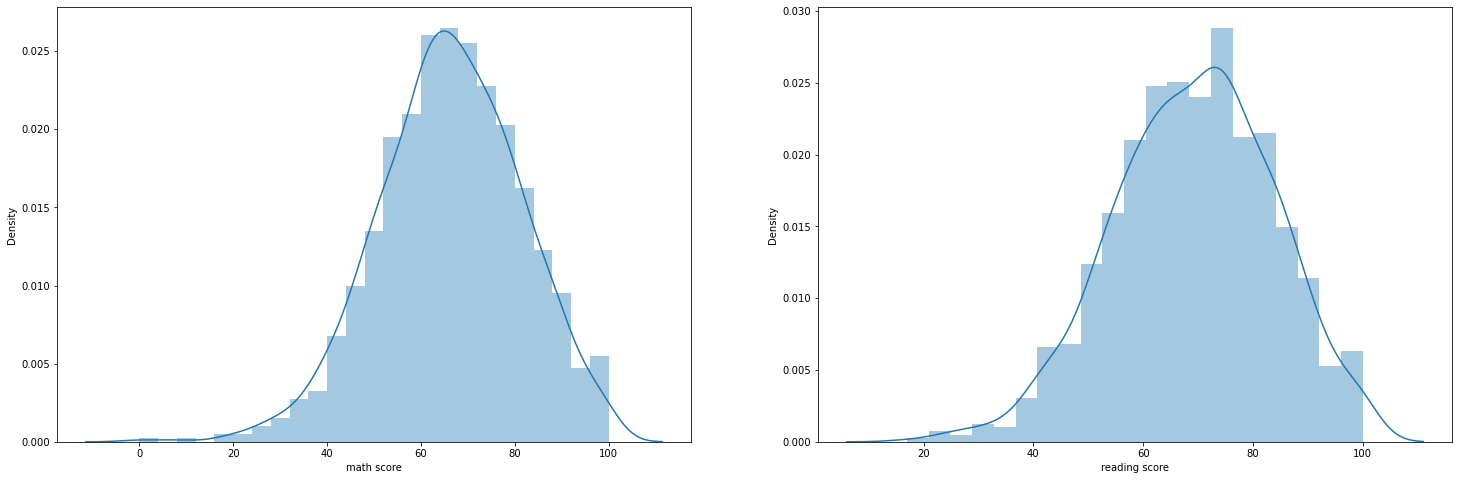

In [52]:
plt.subplots(1,2,figsize=(25,8))
plt.subplot(121)
sns.distplot(data['math score'])
plt.subplot(122)
sns.distplot(data['reading score'])

In [53]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [54]:
data['total marks'] = data['math score']+data['reading score']+data['writing score']
data['average'] = data['total marks']/3

In [56]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [65]:
data.groupby('gender')['average'].max()

gender
female    100.0
male      100.0
Name: average, dtype: float64

In [68]:
data.groupby('race/ethnicity')['average'].max()

race/ethnicity
group A     96.333333
group B     96.666667
group C     98.666667
group D     99.000000
group E    100.000000
Name: average, dtype: float64

In [69]:
data.groupby('gender').mean()

,math score,reading score,writing score,total marks,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [70]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


In [77]:
data[data['math score']<= 30].count()

gender                         16
race/ethnicity                 16
parental level of education    16
lunch                          16
test preparation course        16
math score                     16
reading score                  16
writing score                  16
total marks                    16
average                        16
dtype: int64

In [78]:
data[data['math score']<= 30]['gender'].count()

16

## Checking for Outlier 

### Checking P value

In [80]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total marks', 'average'],
      dtype='object')

In [81]:
numerical_data

['math score', 'reading score', 'writing score']

In [91]:
data_numeric = data[numerical_data]

In [92]:
data_numeric.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [93]:
from scipy.stats import normaltest

In [94]:
normaltest(data_numeric['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

#### Above p value < 0.05 
#### Data is not normal distributed

<AxesSubplot:xlabel='math score', ylabel='Density'>

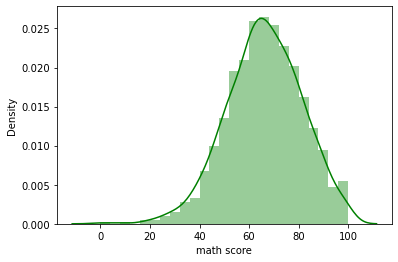

In [102]:
sns.distplot(data_numeric['math score'], color='g')

#### Above data is not normally distributed

# Outlier

### One Way -> Using Box Plot

<AxesSubplot:>

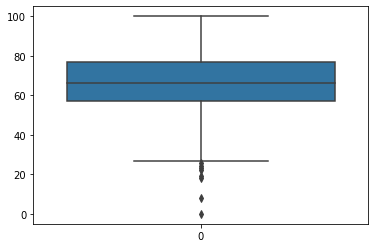

In [132]:
sns.boxplot(data=data_numeric['math score'])

<AxesSubplot:>

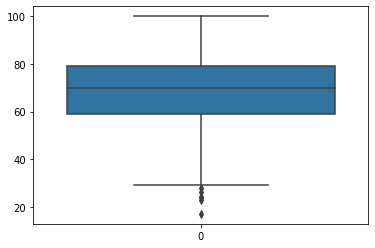

In [133]:
sns.boxplot(data=data_numeric['reading score'])

<AxesSubplot:>

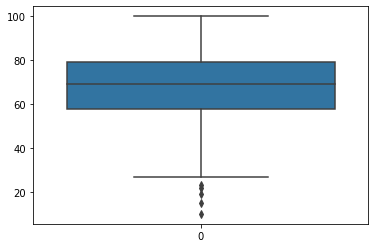

In [134]:
sns.boxplot(data=data_numeric['writing score'])

## Second way -> Using Python code

### Finding 10 % of data

In [141]:
q1 = data['math score'].quantile(0.10)

In [142]:
q1

47.0

### Finding 90 % of data

In [143]:
q3 = data['math score'].quantile(0.90)

In [144]:
q3

86.0

### Maximum data

In [145]:
data['math score'].max()

100

### Minimum Data

In [146]:
data['math score'].min()

0

In [147]:
IQR = q3 - q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)

In [148]:
upper_limit

144.5

In [149]:
lower_limit

-11.5

## Checking Outlier

In [171]:
data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667
787,female,group B,some college,standard,none,19,38,32,89,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,103,34.333333


### There is no data less than lower limit so no outlier for lower limit

In [172]:
data[data['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average


## With this q1 = 10% and q3 = 90% no outlier
## Now we reduce the q1 and q3

In [173]:
q1 = data['math score'].quantile(0.30)
q3 = data['math score'].quantile(0.80)
IQR = q3 - q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)

In [174]:
data[data['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667
787,female,group B,some college,standard,none,19,38,32,89,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,103,34.333333


In [175]:
data[data['math score'] > upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average


### We need to drop data for lower limit, this data is outlier

In [178]:
data_outlier = data[data['math score'] < lower_limit]

In [179]:
data_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667
787,female,group B,some college,standard,none,19,38,32,89,29.666667
842,female,group B,high school,free/reduced,completed,23,44,36,103,34.333333


In [188]:
data2 = data

In [193]:
data2.drop(data2.loc[data['math score'] < lower_limit].index , inplace= True)

In [194]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


## 989 rows outliers are removed

# Graph Analysis

### Univariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

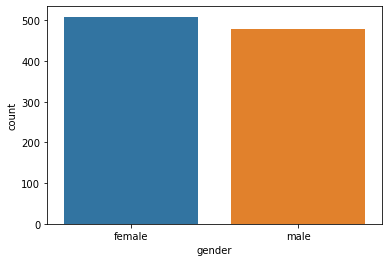

In [198]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

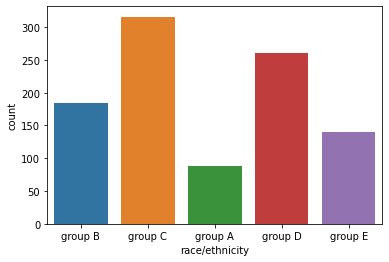

In [199]:
sns.countplot(data['race/ethnicity'])

In [207]:
d1 = data.groupby('gender').mean()

In [208]:
d1

,math score,reading score,writing score,total marks,average
gender,,,,,
female,64.430255,73.308448,73.239686,210.978389,70.326130
male,68.900000,65.627083,63.460417,197.987500,65.995833


In [211]:
d1['average'][0]

70.32612966601178

In [212]:
d1['average'][1]

65.99583333333334

### Average vs Math Score

In [213]:
d1['math score'][0]

64.43025540275049

In [214]:
d1['math score'][1]

68.9

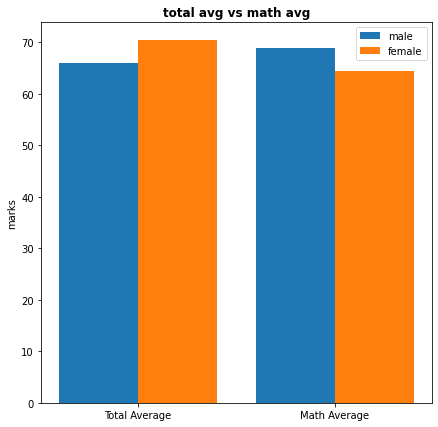

In [225]:
plt.figure(figsize = (7,7))
X = ['Total Average', 'Math Average']
female_score = d1['average'][0],d1['math score'][0]
male_score = d1['average'][1],d1['math score'][1]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg", fontweight= 'bold')
plt.legend()
plt.show()

### Heat Map

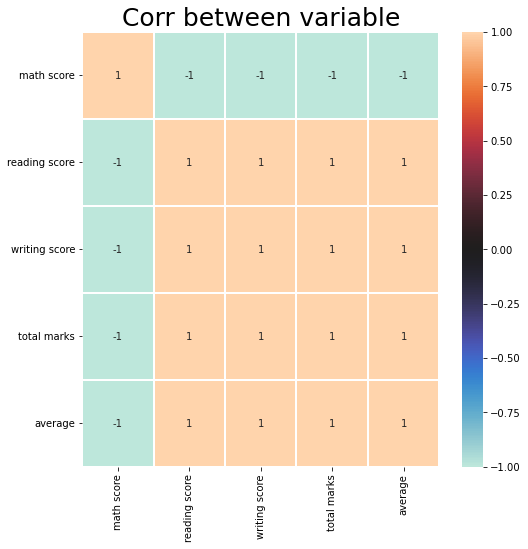

In [233]:
sns.heatmap(d1.corr(), annot=True , cmap='icefire', linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title("Corr between variable", color='black', size = 25)
plt.show()

In [244]:
data2_numerical_data = [feature for feature in data2.columns if data2[feature].dtype != 'O' ]

In [247]:
no_outlier_data = data[data2_numerical_data]

In [249]:
no_outlier_data.head()

,math score,reading score,writing score,total marks,average
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


<AxesSubplot:>

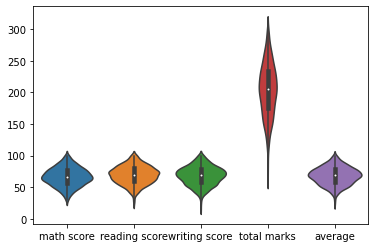

In [250]:
sns.violinplot(data = no_outlier_data)

<AxesSubplot:>

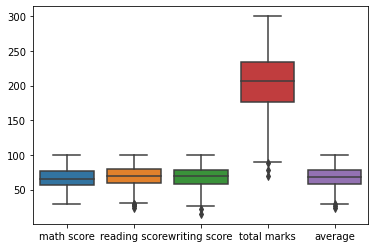

In [251]:
sns.boxplot(data = no_outlier_data)

## We can the outlier for Math Score is Removed